# EEG practical lab
#### Tutores: Mg. Nicolás Bruno y Mg. Tomás D'Amelio

## Consigna
En la clase de hoy nos van a tener que realizar en grupo el análisis desde cero de un set de datos de EEG hasta obtener resultados reportables.

Los grupos no deben estar conformados por más de 3 personas.

Van a tener todo el dia para tarabajar en el practical lab mientras que nosotros vamos a ir respondiendo sus dudas y viendo como van. Si no llegan a terminar lo solicitado durante el día tienen tiempo para enviarlo hasta el siguiente Sábado 13/11.

Van a tener que enviarnos el/los jupyter notebook con su análisis y un archivo word/pdf con el reporte 

## Dataset

El set de datos lo van a poder descargar de aca: 

https://openneuro.org/datasets/ds003690/versions/1.0.0

El dataset cuenta con data de 75 participantes con data de EEG, ECG y pupilar. Tambien cuenta con distintas tareas como pasiva, una tarea simple de RTs y otra Go-Nogo. Nosotros vamos a estar interesados en la tarea Go-Nogo:
"una prueba go/no-go que requiera a los participantes realizar una acción dado un cierto estímulo (e.g. presionar el botón con sabor dulce - Go) e inhibir esa acción bajo un conjunto diferente de estímulos sabor amargo o calor (e.g., no presionar el mismo botón - No-Go)."


## MNE python

Para poder realizar prácticamente todos los análisis van a tener que usar la librería de Python destinada al análisis de EEG llamada MNE. En la siguiente página van a poder encontrar todo la documentación de esta librería con sus funciones y qué hacen las mismas. También van a encontrar tutoriales que explican paso a paso como hacer ciertas cosas.

https://mne.tools/stable/index.html

Recuerden que cuando utilizan una función de una librería en python siempre tienen que anteponer el nombre de la librería y paquete en el que se encuentra. En el caso de mne sería por ejemplo: si quieren usar la funcion para realizar un ICA llamada ICA() la cual se encuentra dentro del paquete ¨preprocessing¨ van a tener que poner mne.preprocessing.ICA()

A su vez recuerden que existen lo que se llaman métodos que son como funciones que se aplican directamente a una variable. Por ejemplo si ustedes quieren aplicar un filtro a su variable que tiene los datos crudos que se llama raw. Tendrian que hacer raw.filter()


## Resolución
Este notebook va ir guiandolos en qué tienen que ir haciendo. Van a encontrar celdas de texto que los introducen un poco a lo que tienen que hacer y celdas con código incompleto que ustedes van a tener que completa y en algunos casos directamente celdas vacías para que completen enteras.

Cualquier consulta pueden consultarnos a nuestros mails:
- nicobruno92@gmail.com
- dameliotomas@gmail.com

In [99]:
### Importamos las librerias que vamos a usar ###

#esto es para que los gráficos aparezcan fuera de jupyter ya que los gráficos de MNE que son interactivos
%matplotlib qt 

# Algunas librerías que podrían resultar de utilidad
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import os
import os.path as op

# importar mne
import mne
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
import openneuro #to install it pip install openneuro-py



# Preprocessing
Lo primero que vamos a hacer es preprocesar los datos de cada sujeto. Para eso nosotros armamos un pipeline (serie de pasos) clásico de preprocesamiento de EEG parecido al que vieron durante la clase de EEG.



## Descargar la data en BIDS format

Vamos a descargar la data de una base de datos llamada open neuro que es de Open Access.
El dataset que vamos a usar es el siguiente:

https://openneuro.org/datasets/ds003690/download

Este dataset se encuentra en un formato que se llama Brain Imaging Data Structure (BIDS), que se utiliza para que todos estos datasets de public access se manejen de forma estandarizada y así es más fácil compartir información y que otros la puedan utilizar.

Creen una carpeta donde quieran que se guarde la data que vamos a descargar

In [33]:
# direccion de la carpeta donde descargamos el archivo
# por ejemplo 'nicobruno/documents/EEG/'
# Download one subject's data from each dataset
bids_root = '/Users/nicobruno/Downloads/practical_lab/'

In [31]:
# vamos a ver que se descargo
print_dir_tree(bids_root, max_depth=4)

|/
|--- .DS_Store
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|code/
|--- .DS_Store
|--- data2BIDS_code/
|------ bids_export_raw_eeg_pupil.m
|--- task_stimulation_codes/
|------ Teste_gng1.m
|------ Teste_gng2.m
|------ Teste_passive.m
|------ Teste_simpleRT1.m
|------ Teste_simpleRT2.m
|sub-AB10/
|--- .DS_Store
|--- eeg/
|------ sub-AB10_task-gonogo_run-1_channels.tsv
|------ sub-AB10_task-gonogo_run-1_coordsystem.json
|------ sub-AB10_task-gonogo_run-1_eeg.json
|------ sub-AB10_task-gonogo_run-1_eeg.set
|------ sub-AB10_task-gonogo_run-1_electrodes.tsv
|------ sub-AB10_task-gonogo_run-1_events.json
|------ sub-AB10_task-gonogo_run-1_events.tsv
|------ sub-AB10_task-gonogo_run-2_channels.tsv
|------ sub-AB10_task-gonogo_run-2_coordsystem.json
|------ sub-AB10_task-gonogo_run-2_eeg.json
|------ sub-AB10_task-gonogo_run-2_eeg.set
|------ sub-AB10_task-gonogo_run-2_electrodes.tsv
|------ sub-AB10_task-gonogo_run-2_events.json
|-----

In [36]:
print(make_report(bids_root))

Request timed out while downloading /Users/nicobruno/Downloads/practical_lab/sub-pd6/ses-off/beh/sub-pd6_ses-off_task-rest_beh.tsv, retrying in 1.0 sec …
Request timed out while downloading /Users/nicobruno/Downloads/practical_lab/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_channels.tsv, retrying in 1.0 sec …
Request timed out while downloading /Users/nicobruno/Downloads/practical_lab/sub-pd6/ses-off/eeg/sub-pd6_ses-off_task-rest_eeg.json, retrying in 1.0 sec …
Request timed out while downloading /Users/nicobruno/Downloads/practical_lab/sub-pd6/ses-on/beh/sub-pd6_ses-on_task-rest_beh.tsv, retrying in 1.0 sec …
Summarizing participants.tsv /Users/nicobruno/Downloads/practical_lab/participants.tsv...
The participant template found: comprised of 15 men and 60 women;
handedness were all unknown; ages ranged from 19.0 to 70.0 (mean = 42.52, std = 19.08)
The EEG, ECG and pupil data from young and older adults: rest and auditory cued
reaction time tasks dataset was created with BIDS version

/var/folders/3p/z_m37csj5cs4hp5x2z1hsfrc0000gq/T/ipykernel_2301/3390368180.py:1: RuntimeWarning: No *scans.tsv files found. Currently, we do not generate a report without the scans.tsv files.
  print(make_report(bids_root))


## Cargar BIDS data

Aquí van a tener que buscar la función de MNE para cargar/leer (read en ingles) la data para el tipo de archivo que vamos a usar. El tipo de archivo en MNE se llama BIDS
Una vez identificada la función van a usarla para leer el archivo de un sujeto

In [71]:
# Solo nos va a interesar la data de EEG
datatype = 'eeg'
suffix = 'eeg'

#vamoss a analizar la task GO-NOGO
task = 'gonogo' 

run = '1'



#Subject that we want to use
# We are going to start with 'sub-AB4'
subject = 'AB4'

bids_path = BIDSPath(subject=subject, task=task, run = run,
                     suffix=suffix, datatype=datatype, 
                    root=bids_root)

In [72]:
bids_path

BIDSPath(
root: /Users/nicobruno/Downloads/practical_lab
datatype: eeg
basename: sub-AB4_task-gonogo_run-1_eeg)

In [73]:
# leer el archivo crudo pasando el path que acabamos de crear al archivo
# pista la funcion a usar deberia llamarse algo como mne.io.read_raw_ext(path, preload = True)
raw = read_raw_bids(bids_path=bids_path, verbose = False)

/var/folders/3p/z_m37csj5cs4hp5x2z1hsfrc0000gq/T/ipykernel_2301/2638217874.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose = False)


Reading events from /Users/nicobruno/Downloads/practical_lab/sub-AB4/eeg/sub-AB4_task-gonogo_run-1_events.tsv.
Reading channel info from /Users/nicobruno/Downloads/practical_lab/sub-AB4/eeg/sub-AB4_task-gonogo_run-1_channels.tsv.


/var/folders/3p/z_m37csj5cs4hp5x2z1hsfrc0000gq/T/ipykernel_2301/2638217874.py:3: RuntimeWarning: EEG Coordinate frame is not accepted BIDS keyword. The allowed keywords are: ['acpc', 'pixels', 'other']
  raw = read_raw_bids(bids_path=bids_path, verbose = False)


Vamos a usar info ahora para ver un poco que hay adentro de nuestro archivo que acabamos de cargar. Esto nos va a decir cuantos canales tenemos y de qué tipo, los nombres de los canales, si ya tiene aplicado algun filtro, cual fue la frequencia de sampleo, etc.

In [81]:
display(raw.info) #display es como print pero se ve mas lindo en jupyter

<Info | 10 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 63 EEG, 2 EOG, 1 ECG
 custom_ref_applied: False
 dig: 66 items (66 EEG)
 highpass: 0.0 Hz
 line_freq: 50
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 250.0 Hz
 subject_info: 11 items (dict)
>

In [75]:
raw.info['sfreq']  # Para ver la frequencia de sampleo especificamente

500.0

In [76]:
raw.info['bads']  # para ver si algun canal esta marcado como malo

[]

In [77]:
raw.ch_names[:10] # el nombre de los primeros 10 canales

['AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6']

In [79]:
len(raw.info['chs']) #cuantos canales hay

66

## Downsampling la data

El Downsampling es un resampleo consiste que en reducir cuantos puntos por segundo queremos que tengan nuestra data. Esto lo hacemos para agilizar nuestros análisis ya que para lo que vamos a hacer no nos interesa que la frecuencia de sampleo sea tan alta.
<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Downsamplear a la mitad de Hz que la orginal (si no recuerdan cuanto era la frecuencia de sampleo está en info bajo sfreq)</li>
    </ul>
</div>

In [80]:
raw.load_data()  # it is required to load data in memory
# Downsamplear la data a la mitad
raw.resample(250) 

<RawEEGLAB | sub-AB4_task-gonogo_run-1_eeg.set, 66 x 130960 (523.8 s), ~66.0 MB, data loaded>

## Visualizar la data cruda

Es muy importante visualizar la data cruda para ver si hay algun canal que la señal esté mala. MNE nos permite generar visualizaciones interactivas en donde yo puedo marcar los canales como malos (se ponen en gris) y cuando cierro el plot (apretando ESC) va a quedar guardado automaticamente ese canal como malo. 

Disclaimer: cuando creen un grafico si o si van a tener que cerrarlo para poder seguir bien con el codigo

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Ver si hay canales malos</li>
    <li>Marcar el canal malo si lo hay</li>
    <li>Ver si pueden indentificar donde hay pestaneos y movimientos oculares</li>
    <li>Identificar los eventos en el plot (son lineas verticales de colores)</li>
    </ul>
</div>

Los canales malos los vamos a descartar (dropear) más adelante

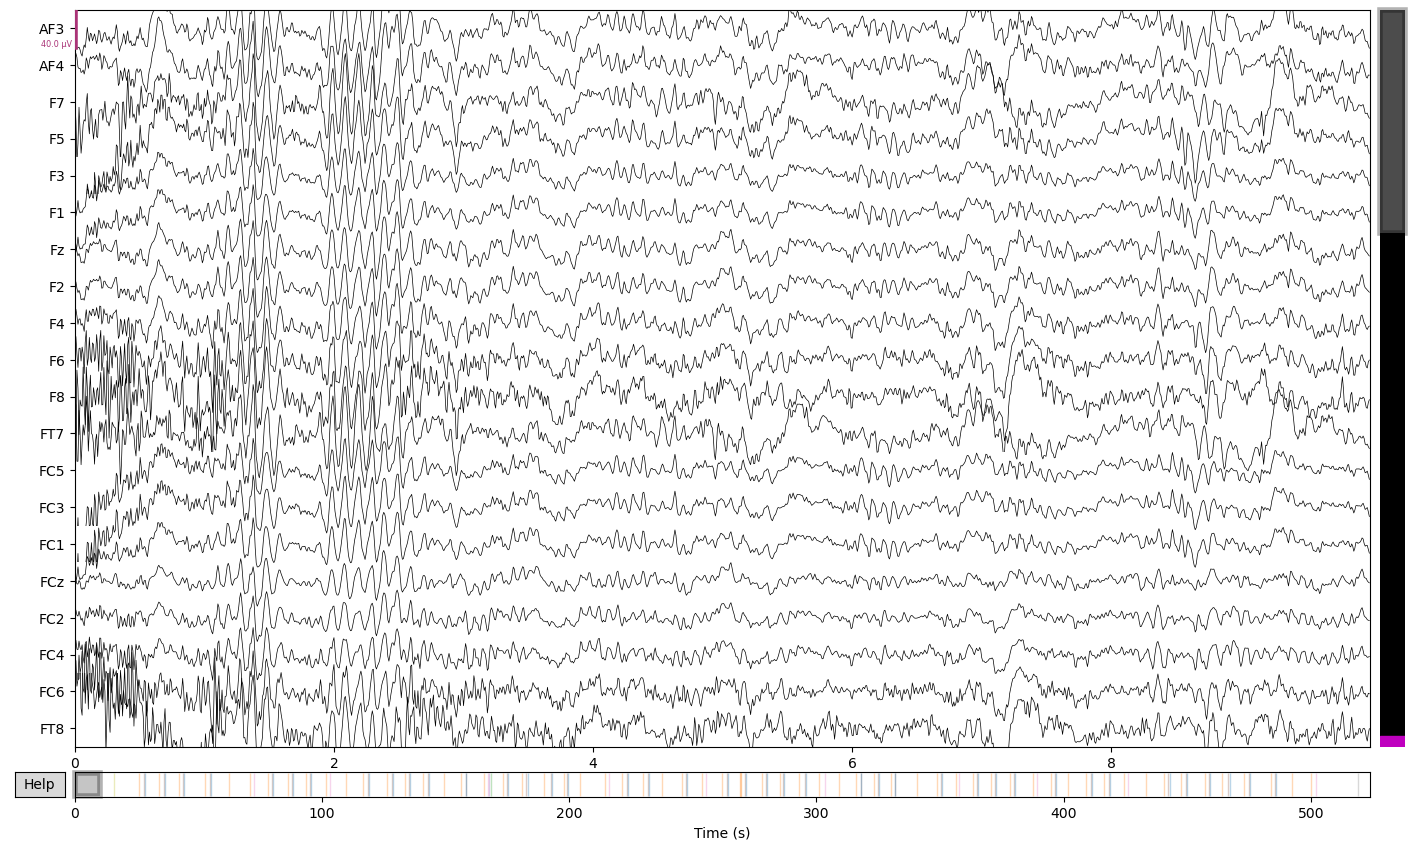

Channels marked as bad: none


In [115]:
raw.plot()

## Filtrado

Ahora vamos a filtrar la data. Esto consiste en descartar las frecuencias que están por abajo o por encima de nuestro interés.
Vamos a aplicar un filtro para todas las frecuencias por encima de 1Hz a esto se lo llama High-pass filter (filtro pasa altos) y todas las frecuencias por debajo de 40Hz Low-pass filter (filtro pasa bajos)

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Filtrar la data cruda entre 1Hz y 40Hz</li>
    </ul>
</div>

In [85]:
# definir valor high pass filter
hpass = 1
# definir valor low pass filter
lpass = 40

# filtrar data cruda
# buscar en la documentacion
# van a tener que utilizar el metodo de mne para filtrar la data 
raw_filtered = raw.filter(hpass,lpass)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)



Ahora vamos a vamos a plotear un PSD para ver como queda el poder para cada freqcuencia. Van a poder ver como por fuera de nuestros cortes el poder de la señal cae. 

Effective window size : 8.192 (s)


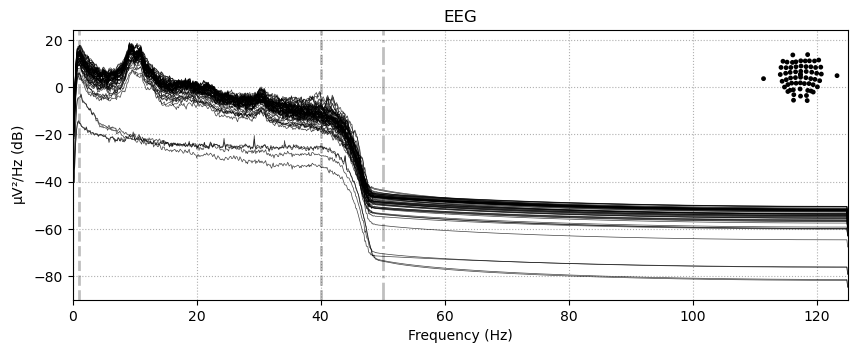

In [87]:
raw_filtered.plot_psd()

## Definir eventos
Una vez que tenemos la data ya filtrada el siguiente paso va a ser poder cortar nuestra data en épocas. O sea, vamos a tener que seleccionar eventos de interés (ej: estimulos, respuestas, etc) y luego cortar la data cruda alrededor de este evento. En este caso nuestros eventos van a ser los eventos que presentamos ya sean go o no-go. Por ende, lo primero que vamos a hacer ahora es buscar estos eventos en la señal. Siempre que trabajamos con este tipo de señales va a ver un canal que esta destinado a marcar en que momento de la señal se presento el evento, y a estas marcas se las llama triggers. En el caso que haya que encotnrar los eventos de un canal de estimulos vas a tener que usar la funcion mne.find_events()

Para este dataset los estímulos ya fueron pasados a anotaciones en la señal, pueden verlas ploteando la raw data. En este caso la función es mne.events_from_annotations()

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Encontrar eventos</li>
    </ul>
</div>

In [109]:
# usar funcion events_from_annotations
events, event_id = mne.events_from_annotations(raw = raw_filtered)

Used Annotations descriptions: ['button press', 'cue', 'error feedback tone', 'error of commission', 'go', 'no-go', 'task end', 'task start']


Esta funcion devuelve dos variables, en este caso events y event_id. Events contiene la informacion sobre todos los triggers. 
Y event_id es un diccionario que contiene el id de cada evento  con su nombre.

In [110]:
print(event_id)
print(events[:10]) #solo los 10 primeros eventos

{'button press': 1, 'cue': 2, 'error feedback tone': 3, 'error of commission': 4, 'go': 5, 'no-go': 6, 'task end': 7, 'task start': 8}
[[ 3936     0     8]
 [ 6530     0     2]
 [ 6956     0     5]
 [ 7096     0     1]
 [ 8530     0     2]
 [ 9002     0     5]
 [ 9111     0     1]
 [10502     0     2]
 [10890     0     5]
 [11015     0     1]]


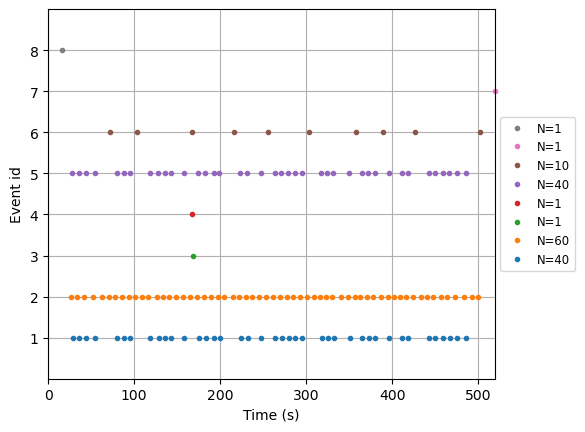

In [107]:
# visualizar los eventos
mne.viz.plot_events(events, raw_filtered.info['sfreq'])

Para este ejercicio los únicos eventos que nos van a interesar son los Go y No-Go. 

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Crear una lista con id de los eventos a incluir</li>
    <li>Uar la funcion pick_events para seleccionar los eventos de interés</li>
    <li>Crear un diccionario para los eventos y sus id a incluir</li>
    </ul>
</div>

In [131]:
# lista con los id de los eventos de interes 
include = [5, 6]

# events to include using pick events
events_included = mne.pick_events(events = events, include = [5,6])

# diccionario de eventos a incluir
event_id_included  ={'go': 5, 
                    'no-go': 6}

## Crear Épocas

Ahora que ya tenemos los eventos identificados con sus id. Podemos crear nuestras épocas alrededor de estos. 
Ahora tenemos que definir de que tiempo a que tiempo va nuestra época. Siempre teniendo como referencia 0 al evento que querramos. Y también tenemos que definir que de ese tiempo vamos a usar para nuestra baseline (línea de base).

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Definir tiempo mínimo de época a los -200ms</li>
    <li>Definir tiempo máximo de época a los 800ms</li>
    <li>Definir baseline de -200ms a 0ms</li>
    </ul>
</div>

tips:
- El tiempo negativo indica que es anterior al evento.
- En mne el tiempo va en segundos no en milisegundos (ms)

In [114]:
# definir tiempo minimo
tmin = -0.2
# definir tiempo maximo
tmax = 0.8
# definir baseline
baseline = (-0.2,0)

Una vez que definimos los tiempos de las épocas ya podemos epoquear. Los eventos que nos van a interesar para este análisis son solo los Go y No-Go.

Una parte muy importante del preprocesado es el descartar épocas malas. Normalmente es recomendable utilizar una combinación de algoritmos de detección de épocas malas e inspección visual de las épocas. En MNE podemos setear un criterio para rejectear las épocas que se van de cierto umbral.

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Epoquear la data cruda filtrada utilizando los tiempos predifinidos</li>
    <li>Epoquear solo para los eventos Go y No-Go</li>
    <li>Pasar a la funcion Epochs el criterio de rejecteo predifinido</li>
    </ul>
</div>

tips:
- Vas a tener que usar la funcion mne.Epochs

In [145]:
#criterio de rejecteo predifinido
reject_criteria = dict(eeg= 200e-6, eog=200e-6) 


epochs = mne.Epochs(raw_filtered, events = events_included, event_id = event_id_included, 
                    tmin = tmin, tmax = tmax, baseline=baseline, reject = reject_criteria) 

Not setting metadata
Not setting metadata
50 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [133]:
print(epochs)

<Epochs |  50 events (good & bad), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
 'go': 40
 'no-go': 10>


## Inspección visual de épocas

Como dijimos para rejectear épocas se utiliza un critrio e inspección viusal. Previamente seteamos los criterio para rejecteo y las marcamos, cuando epoqueamos. En este caso toca realizar la inspección visual de las mismas.

Para esto una vez ploteado van a ir scrolleando todas las épocas y marcando todas las que ustedes consideren malas. Al finalizar de scrollear todas, con ESC salen y se guardan las épocas que marcaron como malas y les va a indicar en base a que electrodos fueron marcadas (esto sirve por si ven que son todas por un solo electrodo podrian dropear el electrodo así no pierden tantas épocas)

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Realizar la inspección visual de todas las épocas</li>
    <li>Marcar las épocas malas</li>
    </ul>
</div>

Loading data for 50 events and 251 original time points ...
    Rejecting  epoch based on EOG : ['HEO']
    Rejecting  epoch based on EOG : ['HEO']
    Rejecting  epoch based on EOG : ['HEO']
    Rejecting  epoch based on EOG : ['HEO']
    Rejecting  epoch based on EOG : ['HEO']
    Rejecting  epoch based on EOG : ['HEO']
6 bad epochs dropped
Loading data for 44 events and 251 original time points ...
Loading data for 20 events and 251 original time points ...


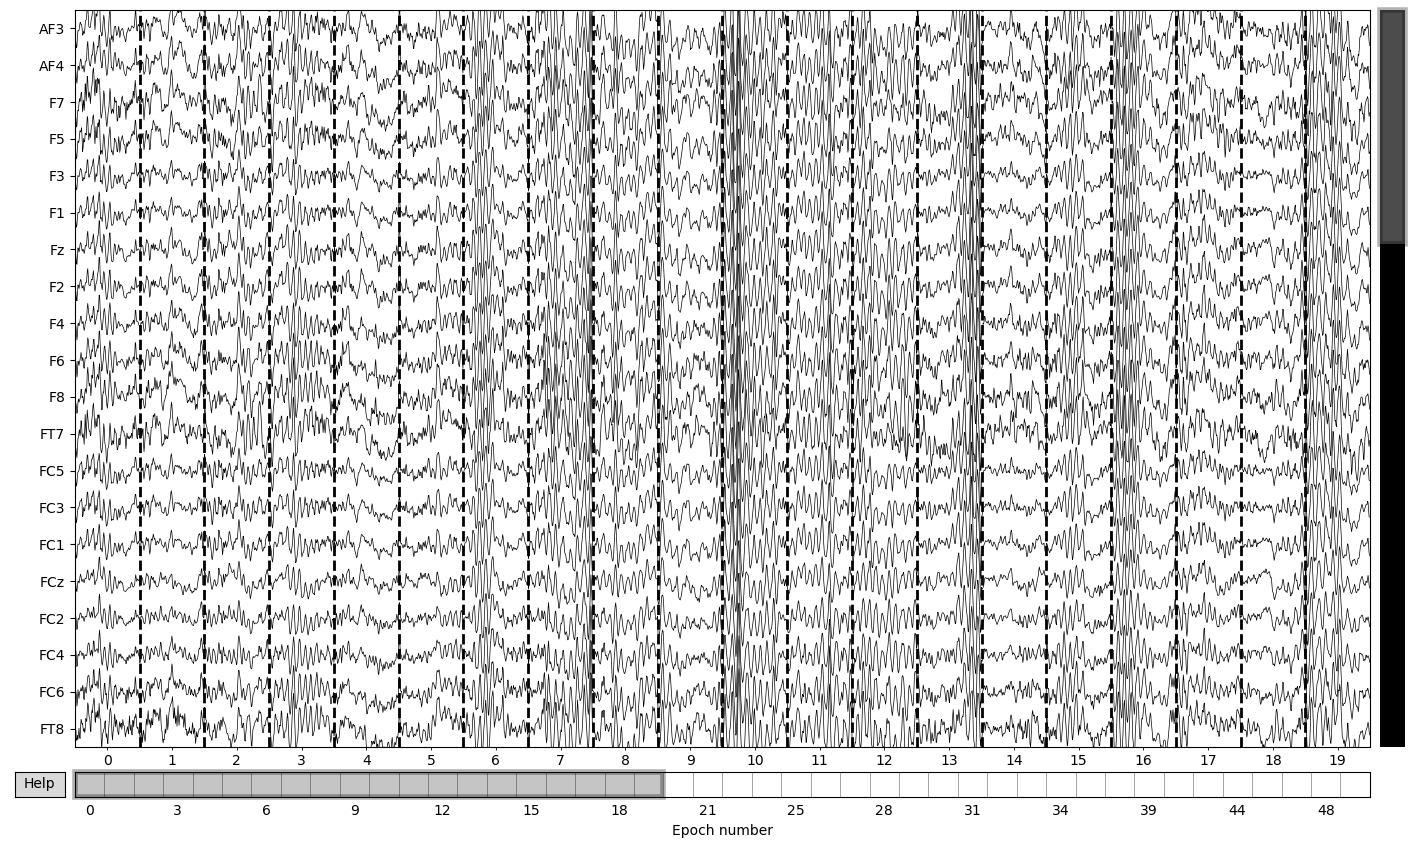

Dropped 2 epochs: 8, 14
Channels marked as bad: none


In [146]:
epochs.plot()

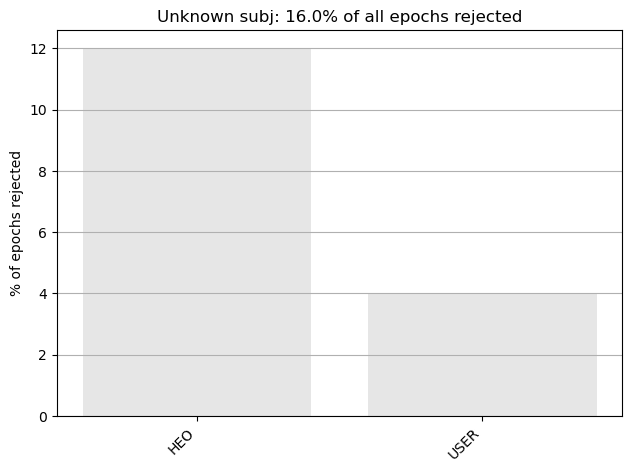

In [147]:
epochs.drop_bad()  # remover las epocas malas
epochs.plot_drop_log() #plotear que épocas dropeamos y bajo que condiciones

In [148]:
print(epochs) # ahora deberiamos tener tantas epocas menos como las que dropeamos

<Epochs |  42 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~92 kB, data not loaded,
 'go': 36
 'no-go': 6>


In [149]:
# convendria guardar aca tal vez

## ICA?

## Interpolar canales malos

## Rereferenceo a grand average de los electrodos

# Crear Evoked

## Guardar evoked para sujeto

# Grand Average entre sujetos

# Estadísticos